In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Boston_house.csv')

In [3]:
#데이터 확인
df  #506*14

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [4]:
#데이터 컬럼 확인
df.info()  #column 모두 non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


##### 변수 설명
- AGE: 1940년 이전에 건축된 주택 비율
- B: 지역의 흑인 거주 비율
- RM: 거주할 수 있는 방 개수
- CRIM: 지역별 범죄 발생률
- DIS: 5개 주요 고용센터까지 가중 거리
- INDUS: 비상업 지역의 넓이 비율
- LSTAT: 하위 계층의 비율
- NOX: 일산화질소 농도
- PTRATIO: 지역의 교사와 학생 수 비율
- RAD: 고속도로 접근 용이도
- ZN: 25,000평피트를 초과하는 거주 지역 비율
- TAX: 10,000달러당 재산세 비율
- CHAS: 찰스강의 더미변수 (1 은 강의 경계 , 0 은 경제 아님
- Target: 본인 소유 주택 가격의 중앙값

##### 선형 회귀를 이용해 분석 모델 구축하기

In [6]:
#pip install pygame --pre

In [7]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.2/11.0 MB 4.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.0 MB 12.6 MB/s eta 0:00:01
   ----- ---------------------------------- 1.6/11.0 MB 17.2 MB/s eta 0:00:01
   -------- ------------------------------- 2.4/11.0 MB 13.9 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/11.0 MB 14.4 MB/s eta 0:00:01
   ---------------- ----------------------- 4.6/11.0 MB 18.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.9/11.0 MB 15.7 MB/s eta 0:00:01
   --------------------- ------------------ 5.8/11.0 MB 16.0 MB/s eta 0:00:01
   -------------------------- ------------- 7.2/11.0 MB 17.7 MB/s eta 0:00:01
   --------------------------------- ------ 9.1/11.0 MB 20.9 MB/s eta 0:00:01
   ---------------------------------------  10.9/11.0 MB 23.4 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 21.8 MB/s eta 0

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
#feature, target 데이터 분리
Y = df['Target']  #레이블(종속변수)
X = df.drop(['Target'], axis=1, inplace=False)  #피처(독립변수)

#train, test 데이터 분리(train:test=7:3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [10]:
lr = LinearRegression()  #선형 회귀 분석 모델 객체 lr(LinearRegression) 분석
lr.fit(X_train, Y_train)  #fit메소드 학습(주어진 데이터로 estimator(사이킷런이 제공) 알고리즘 학습 )
Y_predict = lr.predict(X_test)  #predict 메소드(학습된 모델로 예측 수행)

##### 생성한 선형 회귀 모델을 평가지표를 통해 평가 및 회귀 계수 확인

In [11]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)  #rmse를 활용한 평가

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.757


In [12]:
print('Y-value: ', lr.intercept_)  #y축 절편값
#회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력의 크기
print('Regression-value: ', np.round(lr.coef_,1))

coef = pd.Series(data=np.round(lr.coef_,2), index=X.columns) 
coef.sort_values(ascending=False)  #회귀계수 정렬(내림차순)
#=>RM의 양의 절대값이 제일 크다., NOX가 음의 절대값이 크다.

Y-value:  40.995595172164926
Regression-value:  [  0.    0.    3.4  -0.1  -1.7   0.   -0.6 -19.8  -0.9   0.4   0.1  -0.
   3. ]


RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

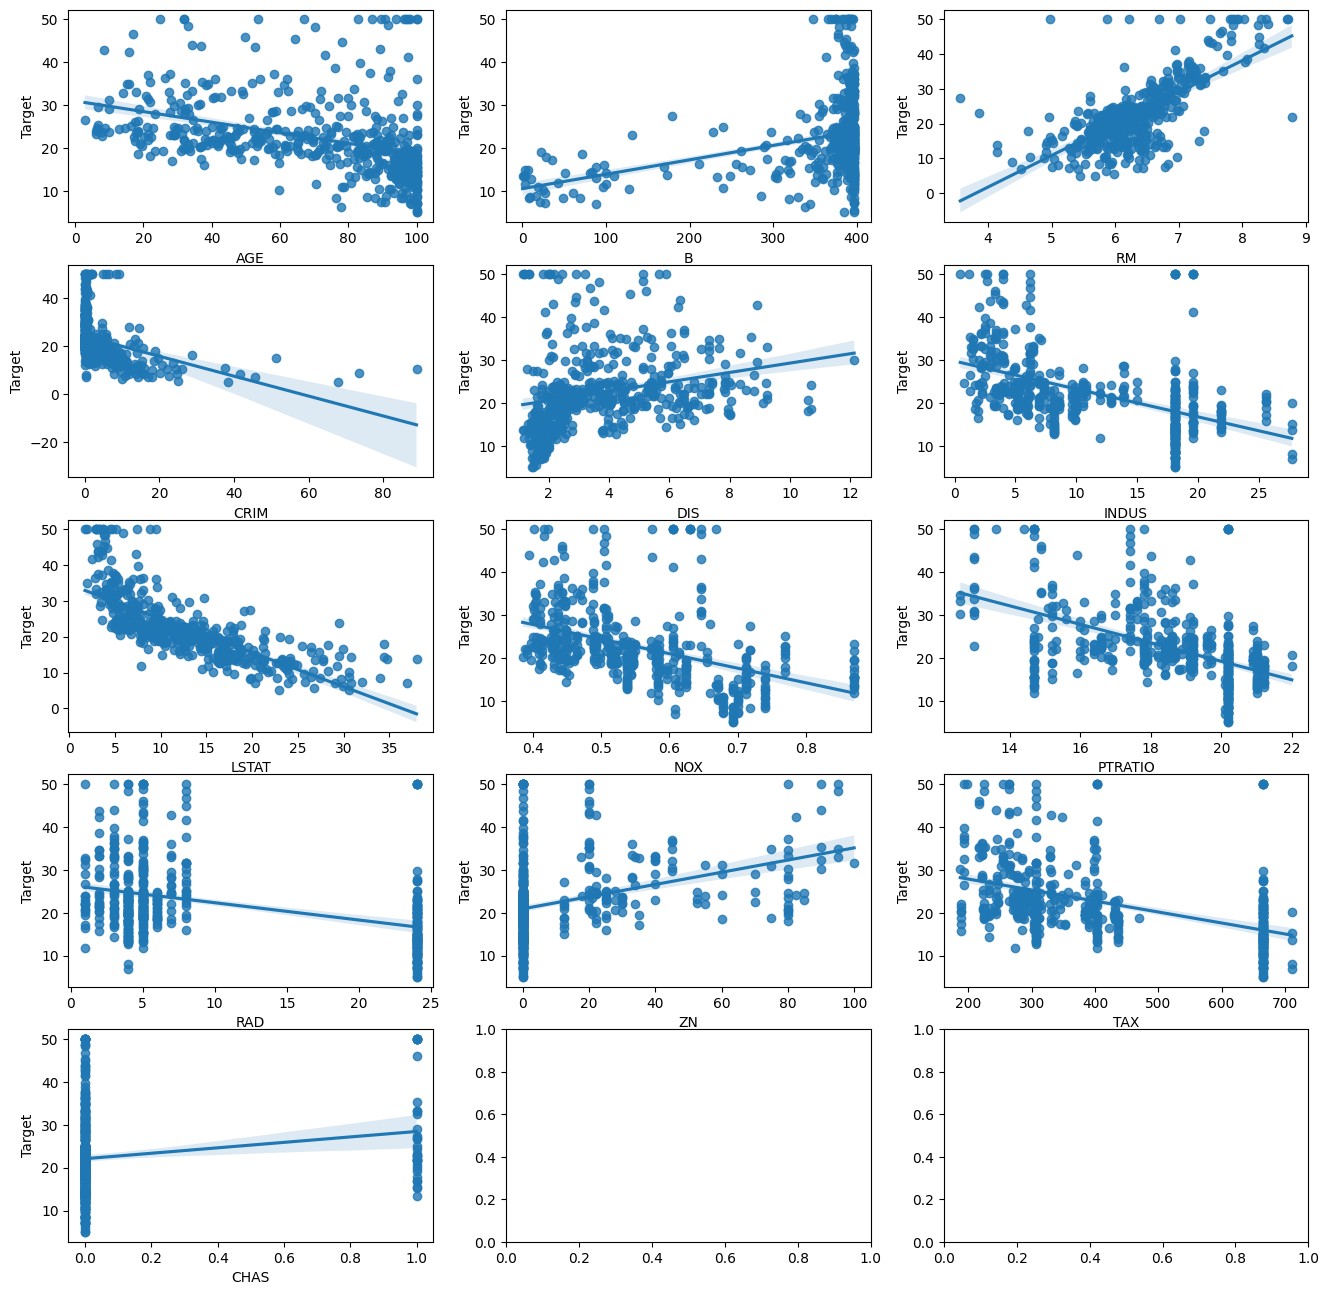

In [17]:
#2*4 subplot 이용, a*x는 4*2
fig, axs = plt.subplots(figsize=(16,16), ncols=3, nrows=5)
x_features = coef.index

#i에는 인덱스, feature에는 RM~RAD까지 순차적으로 들어간다.
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='Target', data=df, ax=axs[row][col])  #회귀직선을 그려준다.
    plt.savefig('E:/0401/빅데이터분석/week12/plt.png')  #그래프 이미지 저장